### Analyzing and Visualizations for Comparison of European Countries

* Europe is a continent located entirely in the Northern Hemisphere and mostly in the Eastern Hemisphere. It is bordered by the Arctic Ocean to the north, the Atlantic Ocean to the west, Asia to the east, and the Mediterranean Sea to the south. It comprises the westernmost part of Eurasia

* Europe covers about 10,180,000 square kilometres (3,930,000 sq mi), or 2% of the Earth's surface (6.8% of land area). Politically, Europe is divided into about fifty sovereign states of which the Russian Federation is the largest and most populous, spanning 39% of the continent and comprising 15% of its population. Europe had a total population of about 741 million (about 11% of the world population) as of 2016.The European climate is largely affected by warm Atlantic currents that temper winters and summers on much of the continent, even at latitudes along which the climate in Asia and North America is severe. Further from the sea, seasonal differences are more noticeable than close to the coast.

* Europe, in particular ancient Greece and ancient Rome, was the birthplace of Western civilization. The fall of the Western Roman Empire in 476 AD and the subsequent Migration Period marked the end of ancient history and the beginning of the Middle Ages. Renaissance humanism, exploration, art and science led to the modern era. Since the Age of Discovery started by Portugal and Spain, Europe played a predominant role in global affairs. Between the 16th and 20th centuries, European powers controlled at various times the Americas, almost all of Africa and Oceania and the majority of Asia.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


<img src="http://wallpoper.com/images/00/40/48/35/europe-boats_00404835.jpg" width="800px">

 **Datasets Used for Analysis**

In [0]:
!pip install bubbly

In [0]:
# for basic operations
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for advanced visualizations
from bubbly.bubbly import bubbleplot 
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# for providing path
import os
print(os.listdir("input"))

['low_savings_2016.csv', 'crime_2016.csv', 'population_2011.csv', 'trust_in_legal_2013.csv', 'work_hours_2016.csv', 'make_ends_meet_2016.csv', 'env_satisfaction_2013.csv', 'perceived_health_2016.csv', 'unemployment_2016.csv', 'trust_in_politics_2013.csv', 'job_satisfaction_2013.csv', 'pollution_2016.csv', 'median_income_2016.csv', 'trust_in_police_2013.csv', 'weather.csv', 'close_relations_2015.csv', 'gdp_2016.csv', 'life_expectancy_2016.csv', 'life_satisfaction_2013.csv', 'leisure_satisfaction_2013.csv', 'underemployment_2016.csv']


In [0]:
pollution = pd.read_csv('ada_europe_data/pollution_2016.csv')
env_satisfaction = pd.read_csv('ada_europe_data/env_satisfaction_2013.csv')
life_satisfaction = pd.read_csv('ada_europe_data/life_satisfaction_2013.csv')
politics = pd.read_csv('ada_europe_data/trust_in_politics_2013.csv')
income = pd.read_csv('ada_europe_data/median_income_2016.csv')
legal = pd.read_csv('ada_europe_data/trust_in_legal_2013.csv')
job_satisfaction = pd.read_csv('ada_europe_data/job_satisfaction_2013.csv')
budget = pd.read_csv('ada_europe_data/make_ends_meet_2016.csv')
crime = pd.read_csv('ada_europe_data/crime_2016.csv')
leisure_satisfaction = pd.read_csv('ada_europe_data/leisure_satisfaction_2013.csv')
underemployment = pd.read_csv('ada_europe_data/underemployment_2016.csv')
close_relations = pd.read_csv('ada_europe_data/close_relations_2015.csv')
low_savings = pd.read_csv('ada_europe_data/low_savings_2016.csv')
weather = pd.read_csv('ada_europe_data/weather.csv')
life_expectancy = pd.read_csv('ada_europe_data/life_expectancy_2016.csv')
unemployment = pd.read_csv('ada_europe_data/unemployment_2016.csv')
police = pd.read_csv('ada_europe_data/trust_in_police_2013.csv')
gdp = pd.read_csv('ada_europe_data/gdp_2016.csv')
health = pd.read_csv('ada_europe_data/perceived_health_2016.csv')
population = pd.read_csv('ada_europe_data/population_2011.csv')
work_hours = pd.read_csv('ada_europe_data/work_hours_2016.csv')

In [0]:
# We import dblp from google drive
id='1bfZzGpT5jQwYuLHfdgPO_4JSLyPsIVBR'

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('globalterrorismdb_0919dist.xlsx')  
df_terrorism = pd.read_excel('globalterrorismdb_0919dist.xlsx',index_col='eventid')

In [0]:
df_terror=df_terrorism[['country_txt','nkill','iyear','imonth']]

In [0]:
df_terror.rename(columns={'country_txt':'country'},inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4238: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
df_terror

,country,nkill,iyear,imonth
eventid,,,,
197000000001,Dominican Republic,1.0,1970,7
197000000002,Mexico,0.0,1970,0
197001000001,Philippines,1.0,1970,1
197001000002,Greece,NaN,1970,1
197001000003,Japan,NaN,1970,1
...,...,...,...,...
201812310030,Afghanistan,8.0,2018,12
201812310031,Afghanistan,NaN,2018,12
201812310032,Afghanistan,1.0,2018,12


In [0]:
df_terror=df_terror.loc[(df_terror['iyear']==2013)]

In [0]:
country=df_terror['country'].unique()

In [0]:
df_terror['nkill'].fillna(0)

eventid
201301010001    0.0
201301010002    1.0
201301010003    0.0
201301010004    0.0
201301010005    0.0
               ... 
201312310071    0.0
201312310073    0.0
201312310078    0.0
201312310079    4.0
201401150074    0.0
Name: nkill, Length: 12041, dtype: float64

In [0]:
nbatt=df_terror['country'].value_counts()
nbatt

Iraq                    2852
Pakistan                2214
Afghanistan             1443
India                    694
Philippines              651
                        ... 
Bahamas                    1
United Arab Emirates       1
Armenia                    1
Belize                     1
Albania                    1
Name: country, Length: 95, dtype: int64

In [0]:
df_nbatt=pd.DataFrame(nbatt)
df_nbatt=df_nbatt.reset_index()
df_nbatt.rename(columns={'index': 'country', 'country': 'nAttacks'}, inplace=True)
df_nbatt

,country,nAttacks
0,Iraq,2852
1,Pakistan,2214
2,Afghanistan,1443
3,India,694
4,Philippines,651
...,...,...
90,Bahamas,1
91,United Arab Emirates,1
92,Armenia,1
93,Belize,1


In [0]:
df_terror

,country,nkill,iyear,imonth
eventid,,,,
201301010001,Pakistan,0.0,2013,1
201301010002,Iraq,1.0,2013,1
201301010003,Iraq,0.0,2013,1
201301010004,Iraq,0.0,2013,1
201301010005,Pakistan,0.0,2013,1
...,...,...,...,...
201312310071,India,0.0,2013,12
201312310073,Bangladesh,0.0,2013,12
201312310078,Mozambique,0.0,2013,12


In [0]:
df_terror.insert(2,'kill_total',0)

In [0]:
for count in country:
  df_terror['kill_total'].loc[(df_terror['country']==count)] = df_terror['nkill'].loc[(df_terror['country']==count)].sum()


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
df_terror['nkill'].loc[df_terror['country']=='Mexico'].sum()

47.0

In [0]:
df_terror.drop(['iyear','imonth','nkill'],axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
df_terror

,country,kill_total
eventid,,
201301010001,Pakistan,2874.0
201301010002,Iraq,7041.0
201301010003,Iraq,7041.0
201301010004,Iraq,7041.0
201301010005,Pakistan,2874.0
...,...,...
201312310071,India,467.0
201312310073,Bangladesh,16.0
201312310078,Mozambique,37.0


In [0]:
df_terror=df_terror.drop_duplicates('country')

In [0]:
 df_terrfin=pd.merge(df_terror, df_nbatt,
                on = 'country')

In [0]:
# let's merge all the datasets on the country column.

x = pd.merge(pollution, env_satisfaction,
                on = 'country')
x1 = pd.merge(x, job_satisfaction,
              on = 'country')
x2 = pd.merge(x1, life_satisfaction,
              on = 'country')
x3 = pd.merge(x2, politics,
              on = 'country')
x4 = pd.merge(x3, income,
              on = 'country')
x5 = pd.merge(x4, legal,
              on = 'country')
x6 = pd.merge(x5, budget,
              on = 'country')
x7 = pd.merge(x6, crime,
              on = 'country')
x8 = pd.merge(x7, leisure_satisfaction,
              on = 'country')
x9 = pd.merge(x8, underemployment,
              on = 'country')
x10 = pd.merge(x9, close_relations,
               on = 'country')
x11 = pd.merge(x10, low_savings,
               on = 'country')
x12 = pd.merge(x11, weather,
               on = 'country')
x13 = pd.merge(x12, life_expectancy,
               on = 'country')
x14 = pd.merge(x13, unemployment,
               on = 'country')
x15 = pd.merge(x14, police,
               on = 'country')
x16 = pd.merge(x15, gdp,
               on = 'country')
x17 = pd.merge(x16, health,
               on = 'country')
x18 = pd.merge(x17, population,
               on = 'country')
x19 = pd.merge(x18, work_hours,
               on = 'country')
data = pd.merge(x19, df_terrfin,
               on = 'country')

# let's drop some of the useless columns present in the dataset
data = data.drop(['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
                 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
                  'Unnamed: 15', 'Unnamed: 16'], axis = 1)

data['political_trust_rating'] = data['political_trust_rating']*10
data['legal_trust_rating'] = data['legal_trust_rating']*10
data['unemp_rate'] = data['unemp_rate']*10
data['police_trust_rating'] = data['police_trust_rating']*10
data['total_pop'] = data['total_pop']/805550

# divinding the values of median income and gdp to get the values within the range of 100
# I have used the minimum and maximum values to get the normalized values between 0 and 100.
data['median_income'] = data['median_income']/287
data['gdp'] = data['gdp']/31600

# let's transpose and check the dataset
data = data.transpose()
data

,0,1,2,3,4,5,6,7,8,9,10,11,12
country,Bulgaria,Denmark,Ireland,Greece,Spain,France,Croatia,Italy,Cyprus,Austria,United Kingdom,Switzerland,Turkey
prct_rpt_pollution,15.1,6.8,4.6,19.6,10.1,14.1,7,15.1,9.2,10.7,9,8.9,24.5
prct_env_satis_high,8.4,52.2,43.7,18.3,23.7,27.9,22.4,11,13.4,57.2,38.2,41.8,18.3
prct_env_satis_med,32.6,36.9,46.2,45.2,58.9,61.6,37.9,53.5,49.3,33.3,50.6,46.2,42.3
prct_env_satis_low,59,10.9,10.1,36.5,17.4,10.5,39.7,35.5,37.3,9.5,11.3,12,39.5
prct_job_satis_high,16.1,44.4,28.3,14,19.4,20,25.6,20.2,28.2,42.2,28,36.6,18.3
prct_job_satis_med,36.1,46.4,51.7,48.3,59.1,64.7,49,62.2,51.8,47.6,49.6,54.9,39.5
prct_job_satis_low,47.7,9.2,20,37.7,21.5,15.4,25.4,17.6,20,10.2,22.4,8.5,42.2
prct_life_satis_high,5.9,42.7,30.6,12.8,18.4,16.1,15,14.2,14.2,37.9,27.8,38.5,11.1
prct_life_satis_med,29.8,46.6,52.7,51.8,58.4,64.8,49.5,63,48.8,49.3,53.2,53.5,38.6


In [0]:
df = data.transpose()

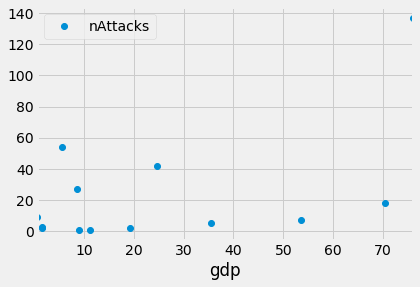

In [0]:
import warnings
warnings.filterwarnings('ignore')


#figure = bubbleplot(dataset = df, x_column='gdp', y_column='prct_job_satis_high', 
 #   bubble_column='country', size_column='total_pop', color_column='country',
  #  x_title="GDP", y_title="Job Satisfaction", title='GDP vs Job vs Population',
 #   x_logscale=False, scale_bubble=3, height=650)
#
#iplot(figure, config={'scrollzoom': True})
df.plot(x='gdp', y='nAttacks', style='o')

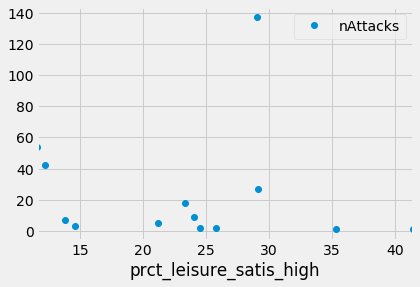

In [0]:
df.plot(x='prct_leisure_satis_high', y='nAttacks', style='o')

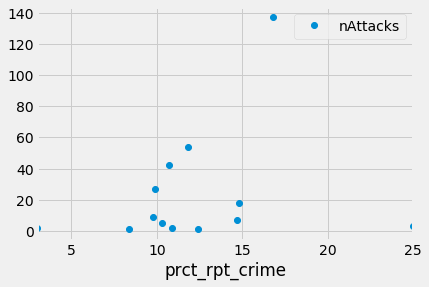

In [0]:
df.plot(x='prct_rpt_crime', y='nAttacks', style='o')

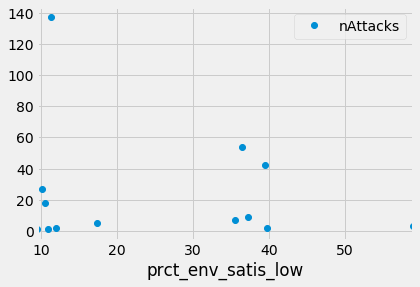

In [0]:
df.plot(x='prct_env_satis_low', y='nAttacks', style='o')